
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

    Определить корни
    Найти интервалы, на которых функция возрастает
    Найти интервалы, на которых функция убывает
    Построить график
    Вычислить вершину
    Определить промежутки, на котором f > 0
    Определить промежутки, на котором f < 0



In [2]:
from sympy import *
from sympy.abc import x

# Здесь задается интервал. Счет ведется на отрезке [start; end] с точностью precision(1, 10, 100 и тд)
f = -12*(x**4)*sin(cos(x))-18*x**3+5*x**2+10*x-30
precision = 1
start = -5
end = 6

xs = [x/precision for x in range(start*precision, end*precision + 1)]
ys = [f.subs(x, value) for value in xs]
points = list(zip(xs, ys))

In [3]:
points = list(zip(xs, ys))
increasing, decreasing = [], []
flag_increase = True
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter + 1][1] > points[counter][1]:
            counter += 1
        if counter != 0:
            increasing.append([points[0][0], points[counter][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter + 1][1] < points[counter][1]:
            counter += 1
        if counter != 0:
            decreasing.append([points[0][0], points[counter][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы возрастания:")
print(*increasing)
print("Интервалы убывания:")
print(*decreasing)

Интервалы возрастания:
[-5.0, -4.0] [2.0, 4.0]
Интервалы убывания:
[-4.0, 2.0] [4.0, 6.0]


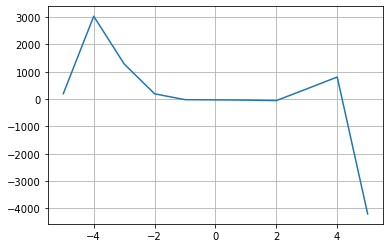

In [4]:
import matplotlib.pyplot as plt

l_board = -5
r_board = 6
x = [-12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30 for x in range(l_board, r_board)]
y = [y for y in range(l_board, r_board)]
plt.plot(y, x)
plt.grid()
plt.show()

In [5]:
# приблизительное нахождение вершин на заданном отрезке
points = list(zip(xs, ys))
extrema = []
flag_incr = True
prior = points[0]
for current in points[1:]:
    if (flag_incr and prior[1] > current[1]) or (not flag_incr and prior[1] < current[1]):
        prior = current
        continue
    else:
        extrema.append(prior)
        prior = current
        flag_incr = not flag_incr

print("Точки экстремума:")
print(*extrema)

Точки экстремума:
(-5.0, 195.949869236045) (-4.0, 3030.03100561643) (2.0, -56.3860824603650) (4.0, 806.031005616432)


In [6]:
# нахождение промежутов, где f > 0 и f < 0
points = list(zip(xs, ys))
above, below = [], []
flag_increase = False
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter][1] > 0:
            counter += 1
        if counter != 0:
            above.append([points[0][0], points[counter - 2][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter][1] < 0:
            counter += 1
        if counter != 0:
            below.append([points[0][0], points[counter - 2][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы, на котором f > 0:")
print(*above)
print("Интервалы, на котором f < 0:")
print(*below)

Интервалы, на котором f > 0:
[-5.0, -3.0] [3.0, 3.0]
Интервалы, на котором f < 0:
[-1.0, 1.0] [5.0, 6.0]
